In [2]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inlinem

Populating the interactive namespace from numpy and matplotlib


In [4]:
os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
os.system("mv rows.csv " + os.getenv("PUIDATA"))

0

In [5]:
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUIDATA') + '/' + 'rows.csv')

In [6]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [7]:
!curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  43.4M      0 --:--:-- --:--:-- --:--:-- 44.5M


In [8]:
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [9]:
os.system("unzip " + os.getenv('PUIDATA') + '/' + "mn_mappluto_16v1.zip")

256

In [10]:
bsize = gp.GeoDataFrame.from_file('MNMapPLUTO.shp')

In [11]:
#bsize.columns

In [12]:
#scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [13]:
nrg.drop(['Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis=1, inplace=True)

In [14]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry'], axis=1, inplace=True)

In [15]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [16]:
bsize.head()

,BBL,UnitsRes,UnitsTotal,YearBuilt
0,1.015450e+09,16,18,1920
1,1.007238e+09,50,50,1914
2,1.016800e+09,10,10,1910
3,1.013850e+09,29,32,1928
4,1.011970e+09,26,26,1900


## converting the relevant columns to numeric values and throwing away spurious entries

In [17]:
def canconvert(mydata):
    '''function to convert hybrid columns to numeric values. 
    Note that the function does not convert any values, but it reports where a conversion to floar is possible.
    The function acts on a single value to use it for an array use the method np.vectorize.
    Argumenrs: 
        mydata: a single value
    Return:
        Bool: where the value can be converted.
    '''
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [18]:
#create the indeces array here to find entries that need to be replaced w nan
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
nrg['Site EUI(kBtu/ft2)'][~indx] = np.nan
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].astype(float)

# PROBABLY NEED TO DO THIS FOR ALL COLUMNS

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
# OR DO IT THIS WAY
#the pd.to_numeric function does the same in a single line!!
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = \
            pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], 
                          errors='coerce').astype(float)
#the line below checks that the conversion worked. should be removed in delivery ready ipynb
#nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

In [20]:
# MY METHOD - DO FOR EVERY COLUMN

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print("True entries %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

indx2 = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print("True entries %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx2] = float('NaN')

indx3 = (np.vectorize(canconvert)(nrg['NYC Borough, Block, and Lot (BBL)']))
print("True entries %d"%sum(indx))
nrg['NYC Borough, Block, and Lot (BBL)'][~indx3] = float('NaN')

True entries 16170
True entries 16170
True entries 16170


# RENAME AND MERGE DATASETS

In [21]:
#renaming the quantity of interest 
#so i can refer to the column as an attribute if i want to while now i can't because the names contain spaces.
#also I want the same name for the common column BBL in both dataframes for merging
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)':'BBL'}, 
           inplace=True)
nrg.head()

# MINE BELOW, near identical:
#nrg = nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)' : 'BBL'})
#nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919.0
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200.0
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000.0


In [22]:
bsize.head()

,BBL,UnitsRes,UnitsTotal,YearBuilt
0,1.015450e+09,16,18,1920
1,1.007238e+09,50,50,1914
2,1.016800e+09,10,10,1910
3,1.013850e+09,29,32,1928
4,1.011970e+09,26,26,1900


In [23]:
# MERGING!!

bblnrgdata = pd.merge(nrg, bsize, how='inner', on=['BBL'])

# MINE
#bblnrgdata = pd.merge(nrg, bsize, on='BBL')

# SCATTER MATRIX
#sfig = scatter_matrix (bblnrgdata, s=300, figsize=(10, 10), diagonal='kde')

# MULTIPLY 2 COLUMNS

In [24]:
## multiplying area by energy/area to get total energy per building
bblnrgdata['nrg'] = bblnrgdata[\
    'Reported Property Floor Area (Building(s)) (ft²)'].astype(float) *\
                bblnrgdata['Site EUI(kBtu/ft2)'].astype(float)
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,YearBuilt,nrg
0,1.006700e+09,NaN,NaN,0,1,1987,NaN
1,1.004370e+09,NaN,NaN,0,4,1920,NaN
2,1.013110e+09,125.4,330000.0,0,56,1977,41382000.0
3,1.009220e+09,NaN,NaN,148,148,1963,NaN
4,1.007400e+09,NaN,68329.0,0,1,1920,NaN


In [25]:
print (bblnrgdata.nrg[bblnrgdata.nrg>0].min())
print (bblnrgdata.nrg.max())

5344.0
350145188000.0


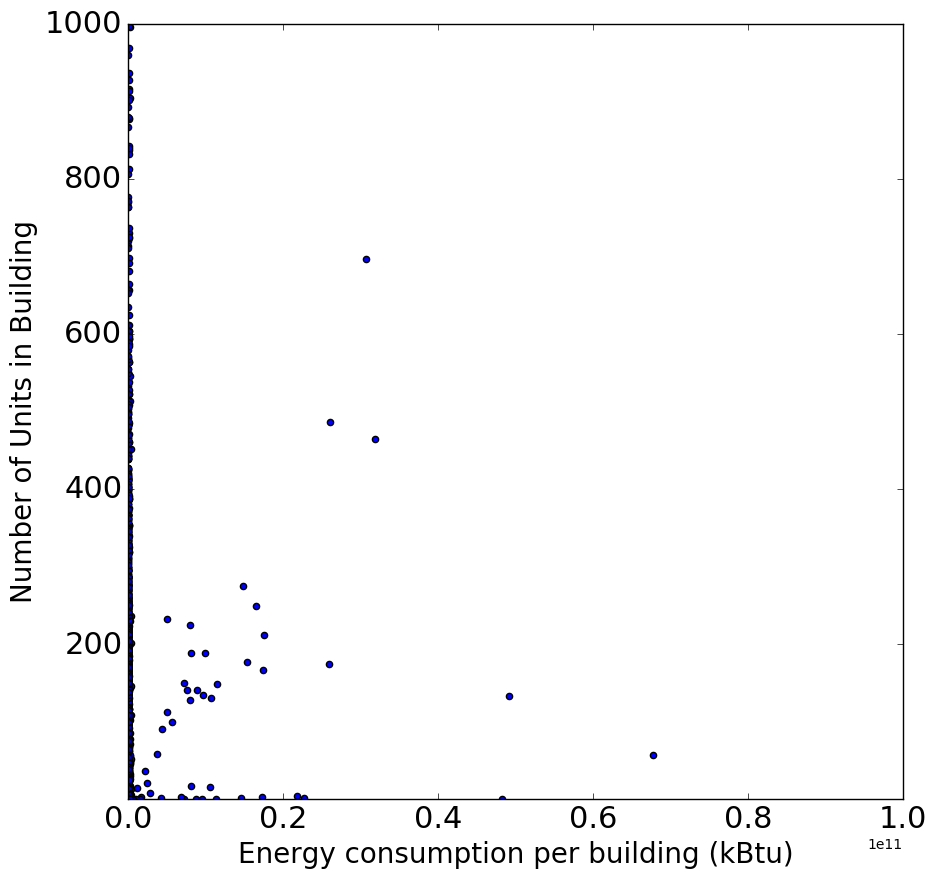

In [26]:
ax = bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal',
                     marker='o', figsize=(10, 10),  
                     xlim=(1000,1e11), ylim=(1,1000), fontsize=22)
yl = ax.set_ylabel("Number of Units in Building", fontsize=20)
xl = ax.set_xlabel("Energy consumption per building (kBtu)", fontsize=20)

Figure 3: Number of Units in the Building as a function of energy consumed. The large range the data span, and the increasing sparcity at large x- and y-values make the plot not at all insightful if plotted over the full range. Notice the scientific notation on the x-axis: the units of energy are in 1e11: in the 100 millions of kBtu's.

In [ ]:
# MY WAY, example:

bsize = bsize[bsize['UnitsTotal']>10]

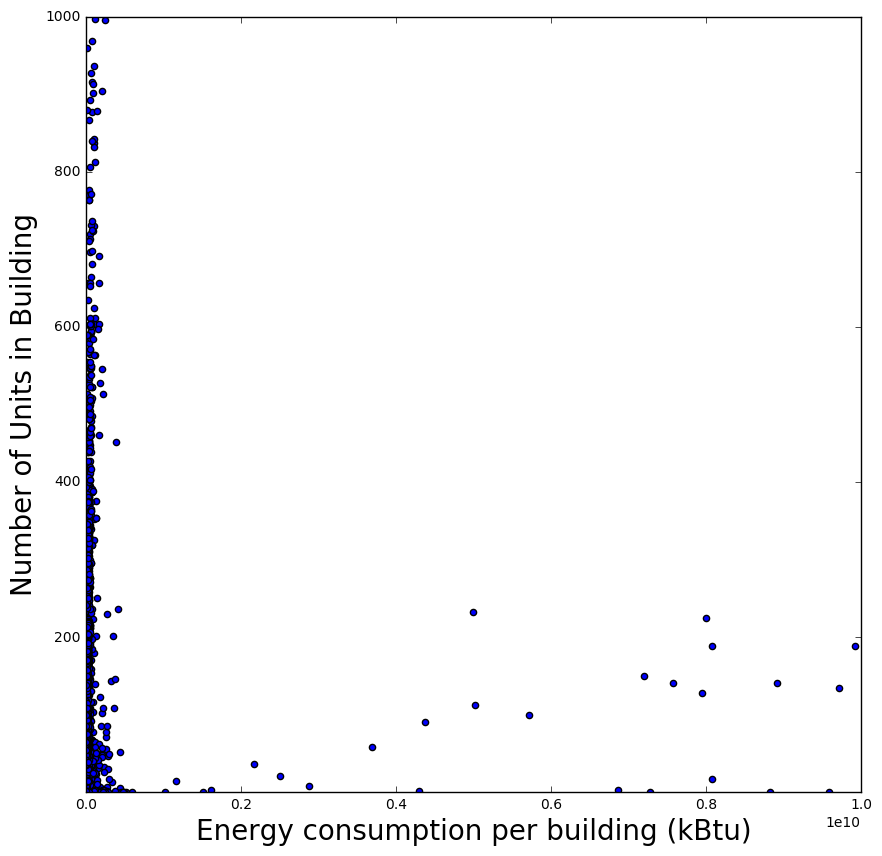

In [27]:
#cutting the limts in the plot to see if patterns emerge
ax = bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                marker='o',  figsize=(10, 10),   
                xlim=(1000,1e10), ylim=(1,1000))
yl = ax.set_ylabel("Number of Units in Building", fontsize=20)
xl = ax.set_xlabel("Energy consumption per building (kBtu)", fontsize=20)

Figure 4: Reducing the range of the plot shows the data but not patters obvious arose yet. Except for the increasing sparsity of data as either variable increases. This may indicate a logarithmic relationship.

# CUTTING THE LIMITS & LOG PLOT

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


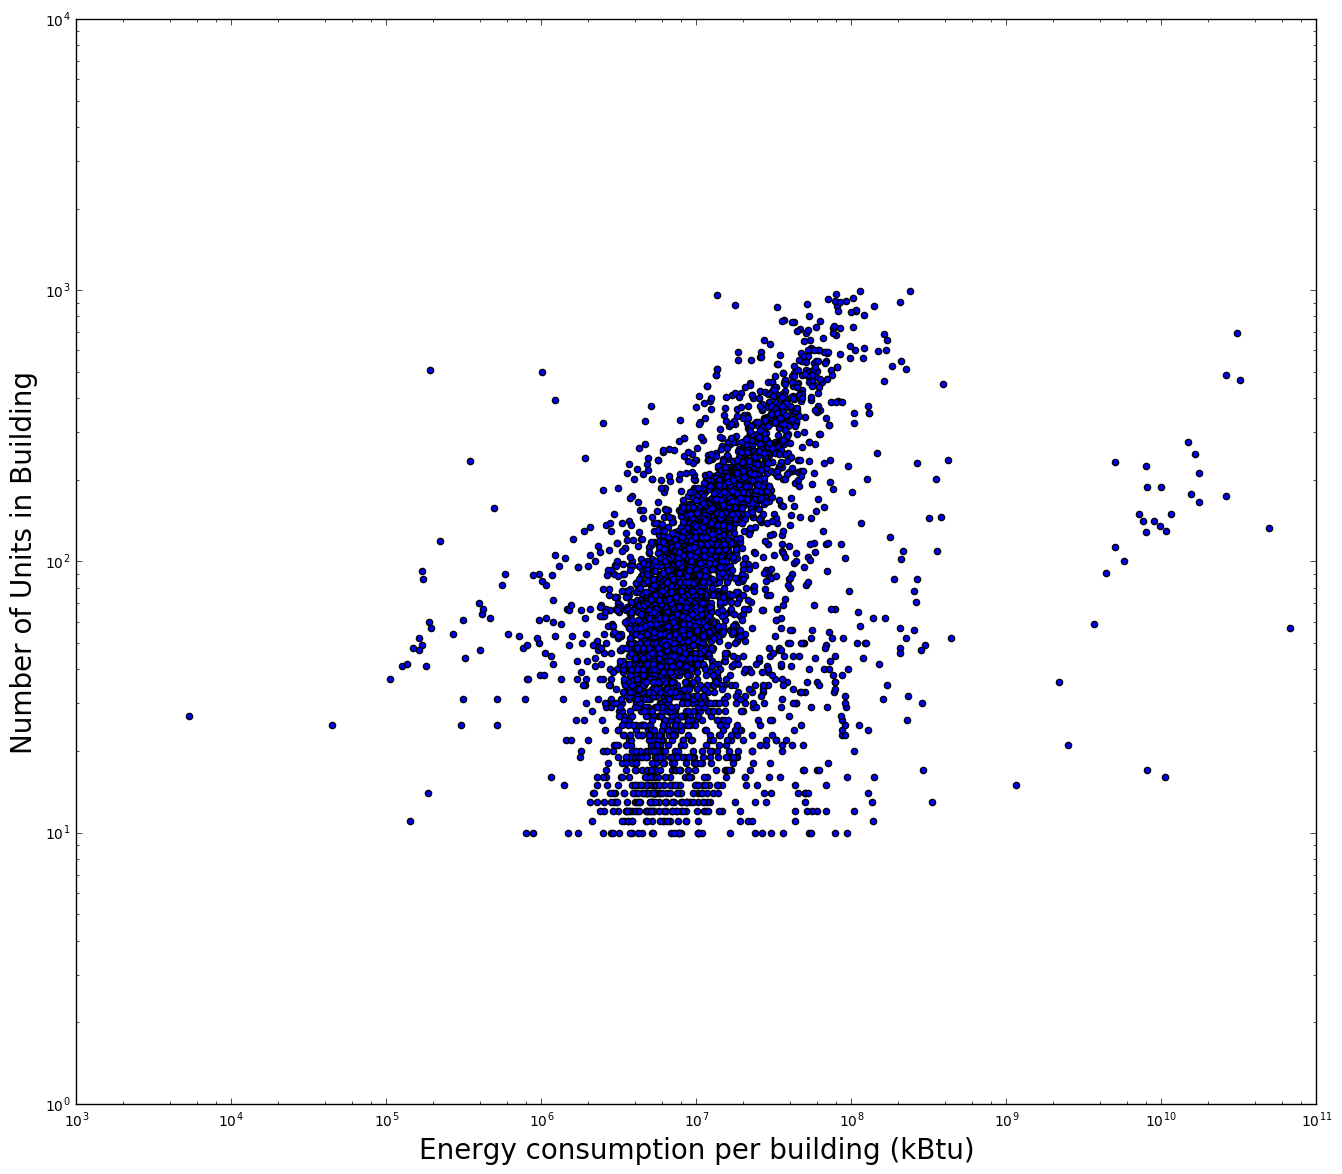

In [28]:
#OK HERE SHE ACTUALLY CUTS THE DATA
bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

ax = bblnrgdataCut.plot(kind='scatter', x='nrg', y='UnitsTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
yl = ax.set_ylabel("Number of Units in Building", fontsize=20)
xl = ax.set_xlabel("Energy consumption per building (kBtu)", fontsize=20)

In [29]:
# OR MY METHOD:

'''
plt.figure(figsize=(15,15))
plt.loglog(bblnrgdata['nrg'], bblnrgdata['UnitsTotal'], 'o')
plt.xlim([10**4, 10**11])
plt.xlabel("Number of Units in Building", fontsize=20)
plt.ylabel("Energy consumption per building (kBtu)", fontsize=20)
plt.title("Energy vs Building Units (Log)")
'''

'\nplt.figure(figsize=(15,15))\nplt.loglog(bblnrgdata[\'nrg\'], bblnrgdata[\'UnitsTotal\'], \'o\')\nplt.xlim([10**4, 10**11])\nplt.xlabel("Number of Units in Building", fontsize=20)\nplt.ylabel("Energy consumption per building (kBtu)", fontsize=20)\nplt.title("Energy vs Building Units (Log)")\n'

# BEST FIT LINE for log space: 
### Units against Energy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     828.3
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          1.22e-166
Time:                        14:40:05   Log-Likelihood:                -1748.3
No. Observations:                4271   AIC:                             3501.
Df Residuals:                    4269   BIC:                             3513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4558      0.081     -5.595      0.000        -0.616    -0.296
nrg            0.3328      0.012     28.781      0.000         0.310     0.355
==============================================================================
Omnibus:                      148.787   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.401
Skew:                          -0.462   Prob(JB):                     2.00e-36
Kurtosis:                       3.262   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

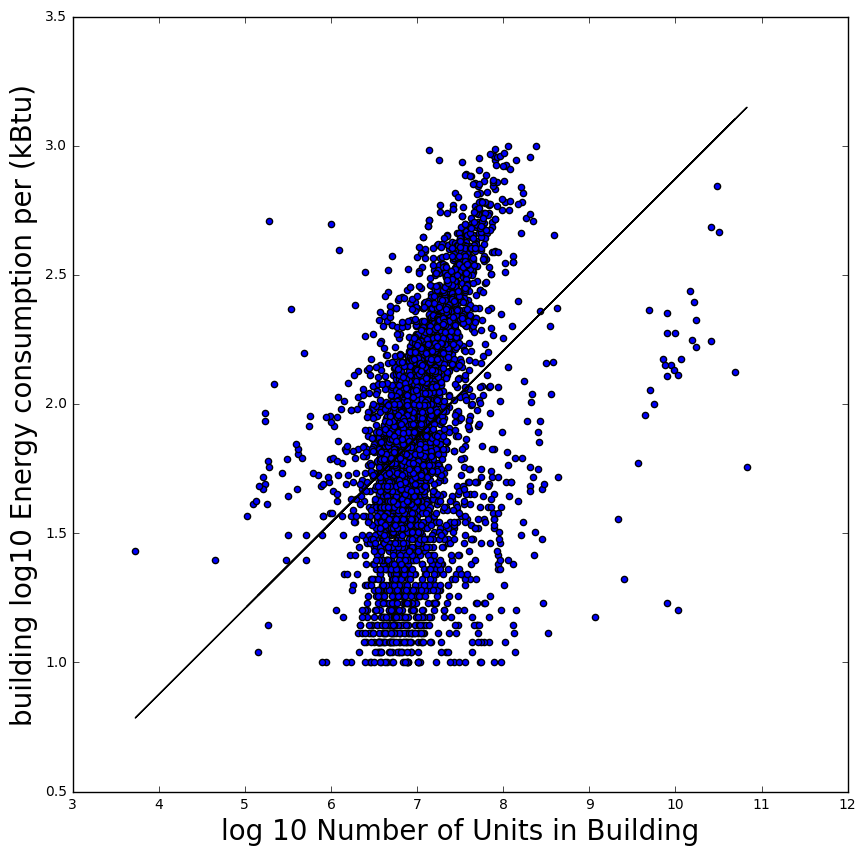

In [30]:
# CAN COPY THIS STUFF FOR BEST FIT LINE - LOG:
def fit_line1(x, y):
    """Fits a line to data properly adding the dimensions required by statsmodels
    Arguments:
        x: series of exogenous variables
        y: seried of endogenous variables
    Output:
        slope, intercept of best fit line, and the full model fit
    """
    #print x
    X = sm.add_constant(x)
    #print X
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse

# NOW PUT IN OWN VARIABLE NAMES:
p1, p0, linmodel_0 = fit_line1(np.log10(bblnrgdataCut.nrg), 
                        np.log10(bblnrgdataCut.UnitsTotal))
pl.figure(figsize=(10, 10))
pl.scatter(np.log10(bblnrgdataCut.nrg), np.log10(bblnrgdataCut.UnitsTotal))
plot(np.log10(bblnrgdataCut.nrg), linmodel_0.predict(), 'k')
xl = pl.xlabel("log 10 Number of Units in Building", fontsize=20)
yl = pl.ylabel("building log10 Energy consumption per (kBtu)", fontsize=20)
linmodel_0.summary()


Figure 5: Line for to Units vs Energy consumption in log space: a line fit indicates a power law relationship between the variables. The adjusted R^2 indicates only 16% of the variability is accounted for by this model (poor fit)

### Energy against Units

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     828.3
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          1.22e-166
Time:                        14:40:34   Log-Likelihood:                -2567.3
No. Observations:                4271   AIC:                             5139.
Df Residuals:                    4269   BIC:                             5151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1103      0.033    187.053      0.000         6.046     6.174
UnitsTotal     0.4883      0.017     28.781      0.000         0.455     0.522
==============================================================================
Omnibus:                     2262.059   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44735.688
Skew:                           2.083   Prob(JB):                         0.00
Kurtosis:                      18.298   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

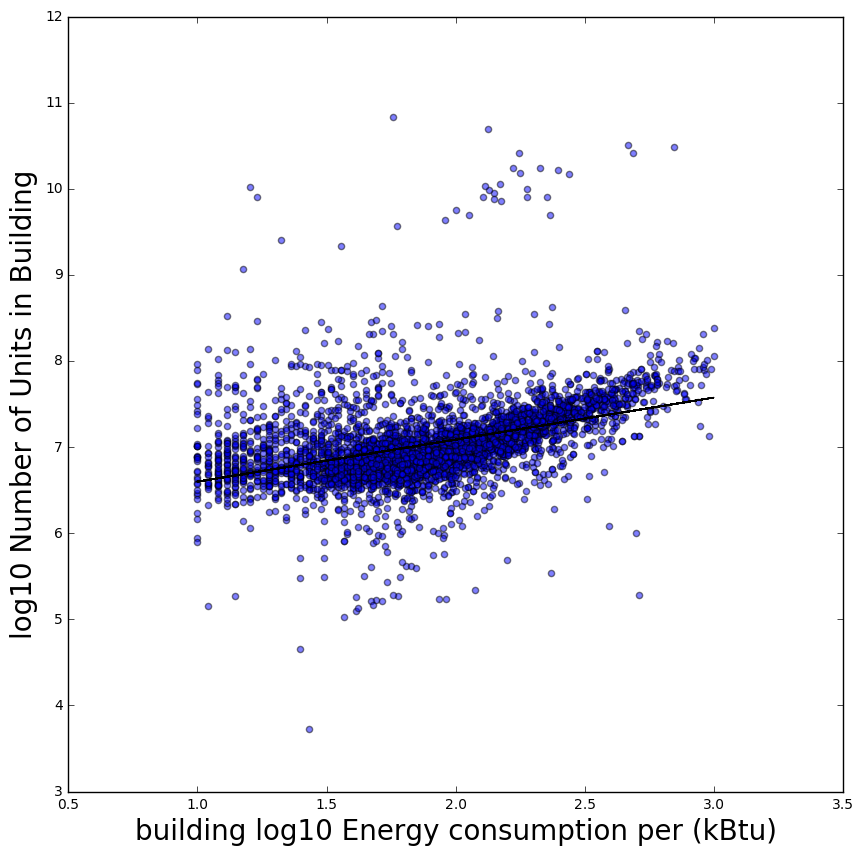

In [32]:
#my method

p1, p0, linmodel_1 = fit_line1(np.log10(bblnrgdataCut.UnitsTotal), 
                        np.log10(bblnrgdataCut.nrg))
pl.figure(figsize=(10,10))
pl.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.nrg), alpha = 0.5)
plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel_1.predict(), 'k')
yl = pl.ylabel("log10 Number of Units in Building", fontsize=20)
xl = pl.xlabel("building log10 Energy consumption per (kBtu)", fontsize=20)
linmodel_1.summary()

## you cannot use the LR test to compare these models cause the models are NOT NESTED

# Define a chisquare function

In [33]:
# CAN JUST COPY THIS CELL
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [34]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured quantities, each of which will have errors. 
## The minimum error is the squareroot of the value

# NOW PUT IN OWN VARIABLE NAMES /RENAME (the two affecting energy; see above)
#errors on the measured quantities
errorsnrg = np.sqrt((bblnrgdataCut['Reported Property Floor Area (Building(s)) (ft²)'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))

## Assume count statistics in the number of units as well (so do this for the other variable too)
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

## Propagation of errors on the log


In [35]:
# REPLACE WITH OWN VARIABLES /RENAME:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.nrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] =errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Compare line fit with chisquare

remember:

chi2(data, model, errors = None)

In [36]:
print ("Units vs Energy residuals (no errors include): %.2f"%\
       chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel_0.predict()))
print ("Energy vs Units residuals (no errors include): %.2f"%\
        chi2(np.log10(bblnrgdataCut.nrg), linmodel_1.predict()))

print ("Units vs Energy chi square w IV error only: %.2f"%\
       chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel_0.predict(), 
            errors = bblnrgdataCut.errorsunits))
print ("Energy vs Units chi square w IV error only: %.2f"%\
        chi2(np.log10(bblnrgdataCut.nrg), linmodel_1.predict(), 
             errors = bblnrgdataCut.errorsnrg))

print ("Units vs Energy chi square: %.2f"%\
       chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel_0.predict(), 
            errors = np.sqrt(bblnrgdataCut.errorsnrg**2 + bblnrgdataCut.errorsunits**2)))
print ("Energy vs Units chi square: %.2f"%\
        chi2(np.log10(bblnrgdataCut.nrg), linmodel_1.predict(), 
             errors = np.sqrt(bblnrgdataCut.errorsnrg**2 + bblnrgdataCut.errorsunits**2)))

Units vs Energy residuals (no errors include): 567.02
Energy vs Units residuals (no errors include): 832.09
Units vs Energy chi square w IV error only: 487585.00
Energy vs Units chi square w IV error only: 3493094131736.39
Units vs Energy chi square: 431629.93
Energy vs Units chi square: 484051.13


# Fit with 2nd degree polynomial

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logNrg   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     617.8
Date:                Thu, 27 Oct 2016   Prob (F-statistic):          2.34e-236
Time:                        14:44:37   Log-Likelihood:                -2403.1
No. Observations:                4271   AIC:                             4812.
Df Residuals:                    4268   BIC:                             4831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            8.0811      0.111     72.650      0.000         7.863     8.299
logUnits            -1.6807      0.119    -14.176      0.000        -1.913    -1.448
I(logUnits ** 2)     0.5706      0.031     18.471      0.000         0.510     0.631
==============================================================================
Omnibus:                     2407.772   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59002.981
Skew:                           2.200   Prob(JB):                         0.00
Kurtosis:                      20.669   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

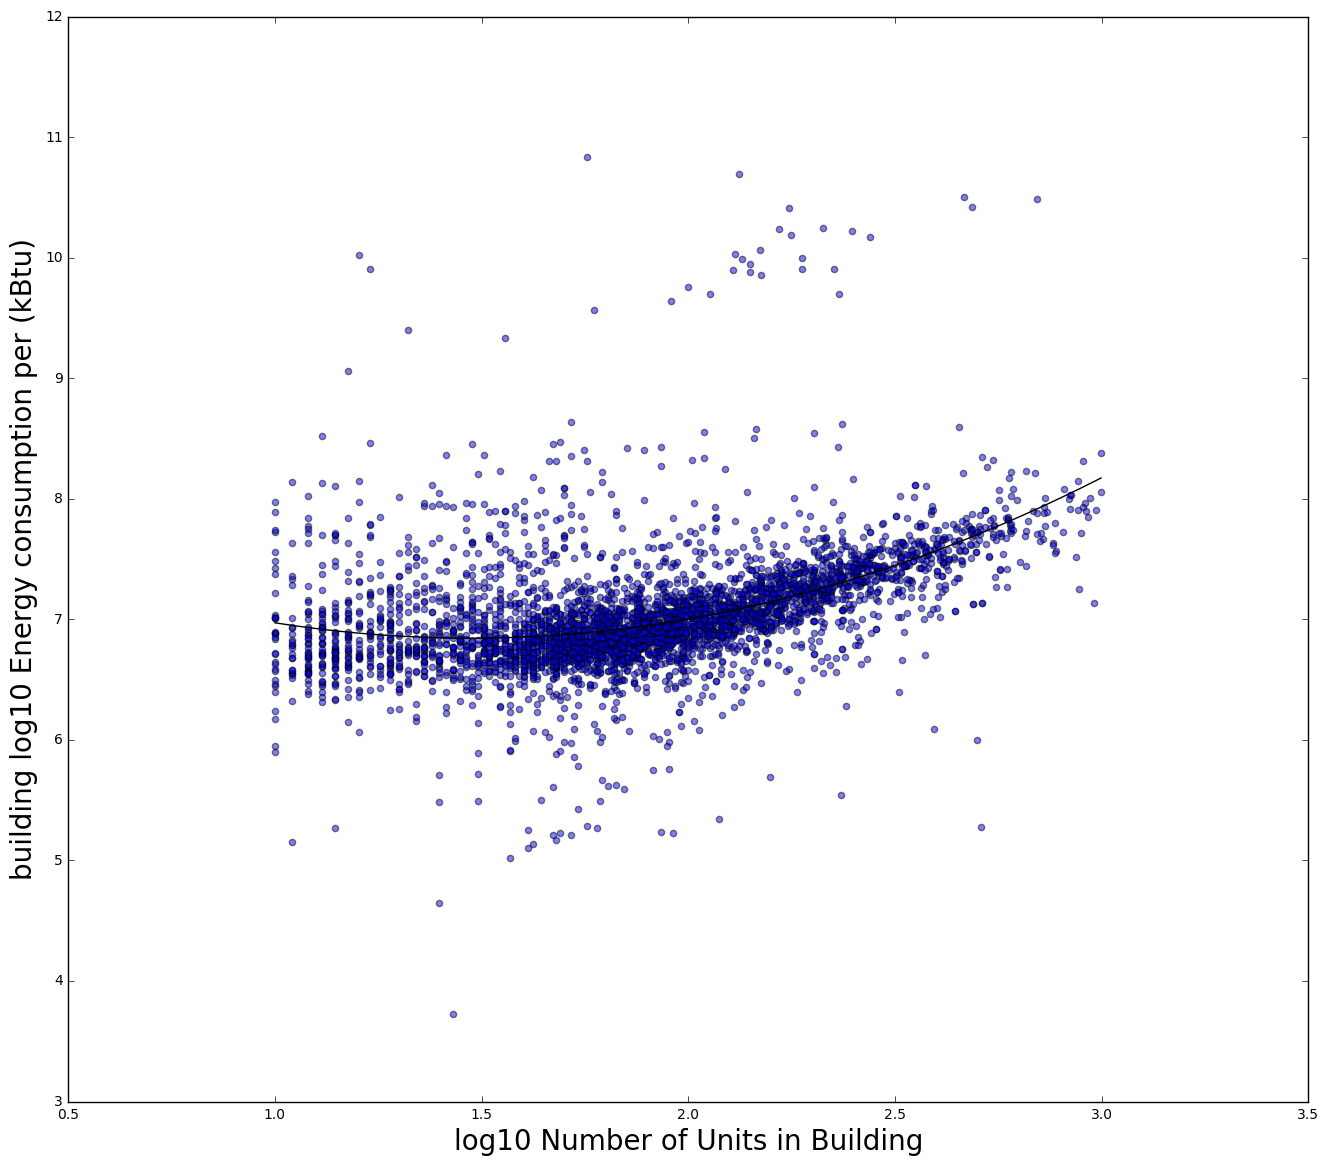

In [37]:
bblnrgdataCut['logNrg']  = np.log10(bblnrgdataCut.nrg)
bblnrgdataCut['logUnits']  = np.log10(bblnrgdataCut.UnitsTotal)

X = np.linspace(bblnrgdataCut['logUnits'].min(), bblnrgdataCut['logUnits'].max(), 1000)
curvemodel = smf.ols(formula = 'logNrg ~ logUnits + I(logUnits**2)', 
                          data = bblnrgdataCut).fit()
pl.figure(figsize=(16,14))
pl.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut.nrg), alpha = 0.5)
plot(X, curvemodel.predict(exog = dict(logUnits = X)), 'k')
xl = pl.xlabel("log10 Number of Units in Building", fontsize=20)
yl = pl.ylabel("building log10 Energy consumption per (kBtu)", fontsize=20)
curvemodel.summary()

In [38]:
alpha = 0.05
print ("LR : ", -2 * (linmodel_1.llf - (curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linmodel_1))
LR = curvemodel.compare_lr_test(linmodel_1)

print ("We ", end="")
if LR[0] < 3.84: #0.05 level for 1 DOF chi sq distribution 
    print ("CANNOT") 
    
print ("reject the Null hypothesis that the restricted (linear) " + 
       "model is better than the 2nd degree polynomial fit with p-value ", end="")
print ("p < %.3f"%alpha)

LR :  328.460515612
LR from statsmodels: (328.46051561187596, 2.0801346736060625e-73, 1.0)
We reject the Null hypothesis that the restricted (linear) model is better than the 2nd degree polynomial fit with p-value p < 0.050


## The curve fit and linear fit for Energy vs Units can be compared with LR test because they are nested models

### Two statistical models are nested if the first model can be transformed into the second model by imposing constraints on the parameters of the first model. 

# Plotting the likelihood surface (assuming gaussian statistics)

### creating a function that returns the likelihood value on a grid


In [39]:
#residuals without errors
resids_noerror = np.ones((200,200))*float('NaN')
indxs_noerror = np.ones((200,200,2))

for i,l in enumerate(np.arange (-100, 100, 1)):
    for j,k in enumerate(np.arange(-50.0, 50.0, 0.5)):
        #print j
        indxs_noerror[i,j] = (l, k)
        resids_noerror[i,j] = chi2(bblnrgdataCut.logNrg, bblnrgdataCut.logNrg * k + l)
        #print resids[i,j]

In [40]:
#residuals with errors (chisq)
resids = np.ones((200,200))*float('NaN')
indxs = np.ones((200,200,2))

for i,l in enumerate(np.arange (-100, 100, 1)):
    for j,k in enumerate(np.arange(-50.0, 50.0, 0.5)):
        #print j
        indxs[i,j] = (l, k)
        resids[i,j] = chi2(bblnrgdataCut.logNrg, bblnrgdataCut.logNrg * k + l, 
                           errors=np.sqrt(bblnrgdataCut.errorsnrg**2 + bblnrgdataCut.errorsunits**2))
        #print resids[i,j]

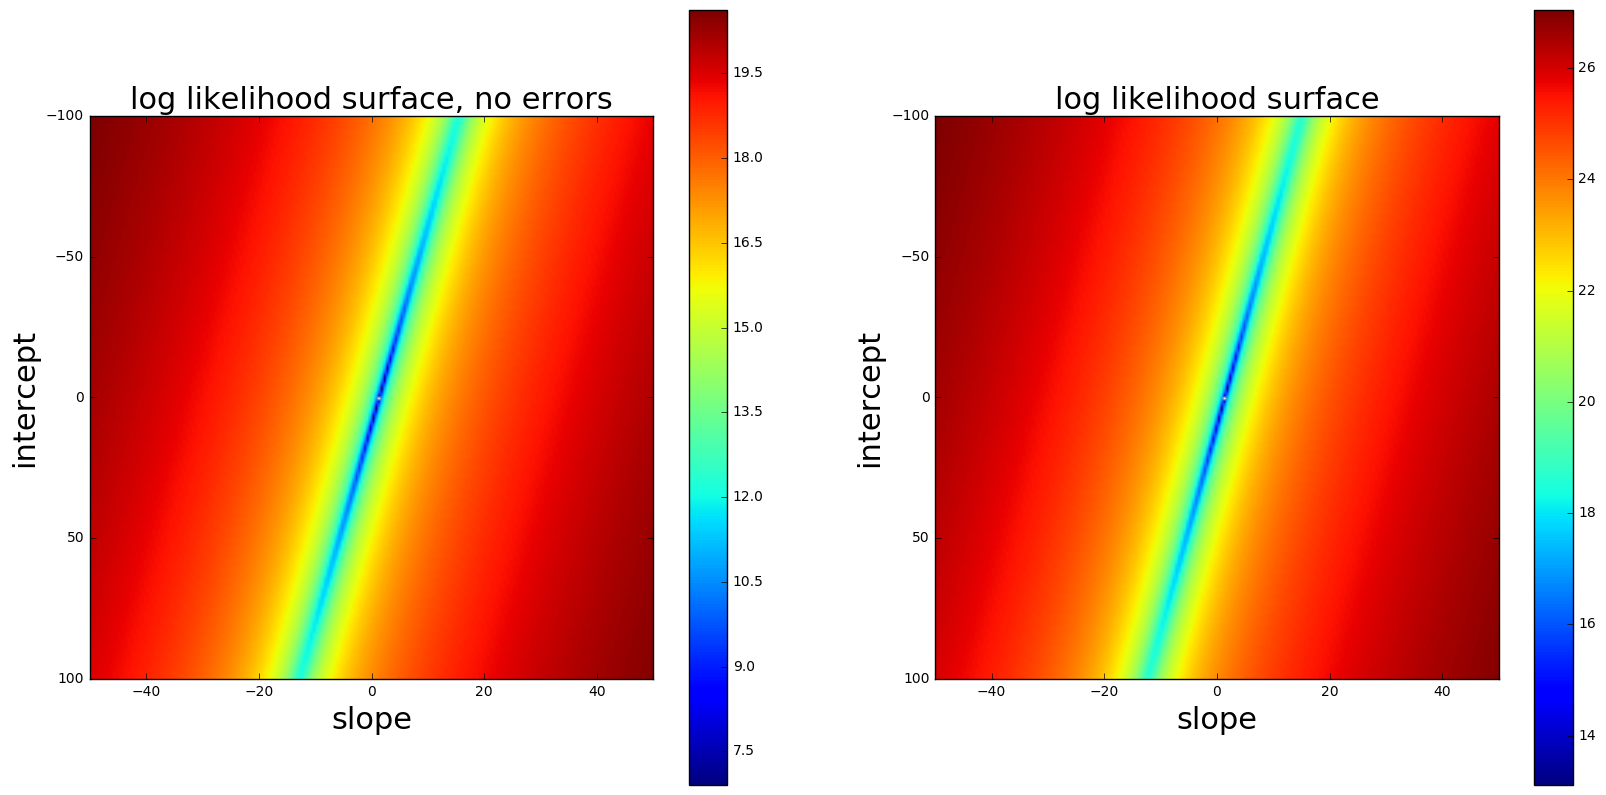

In [42]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.set_title ("log likelihood surface, no errors", fontsize = 22)
pl.imshow(np.log(resids_noerror), extent = [-50,50,100,-100], aspect=0.5)
ax1.set_xlabel('slope', fontsize = 22)
ax1.set_ylabel('intercept', fontsize = 22)
pl.colorbar()

ax2 = fig.add_subplot(122)
ax2.set_title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(resids), extent = [-50,50,100,-100], aspect=0.5)
ax2.set_xlabel('slope', fontsize = 22)
ax2.set_ylabel('intercept', fontsize = 22)
pl.colorbar()


Figure 10: The map of log likelihood for the minimixation with no errors (left) and with errors on both axes (right) The location of hte minimum is in a similar place and the side by side comparison does not allow to spot differences.

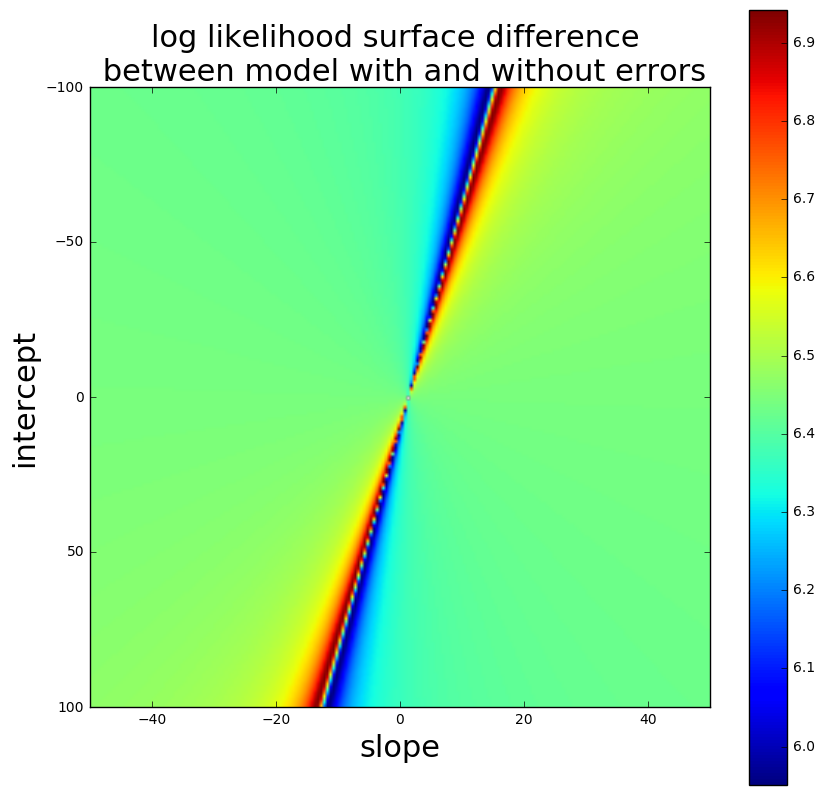

In [41]:
#plotting the difference between the 2 likelihood surfaces
ax1 = pl.figure(figsize=(10,10)).add_subplot(111)
ax1.set_title ("log likelihood surface difference \n between model with and without errors", fontsize = 22)
pl.imshow(np.abs(np.log(resids) - np.log(resids_noerror)), extent = [-50,50,100,-100], aspect=0.5)
ax1.set_xlabel('slope', fontsize = 22)
ax1.set_ylabel('intercept', fontsize = 22)
pl.colorbar()

Figure 11: The difference in the log-likelihood surface generated by assuming equal (homoeschedastic) errors and by calculating the errors as shut noise (Poisson statistics) on the measurements. The location of the minimum is similar, while the 2d vector solution diverges away from the minimum.